In [1]:
from multiprocessing import freeze_support

import torch
from torch import nn
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader, Sampler
from torchvision import datasets
from torchvision.transforms import transforms
from torch.optim import Adam

import matplotlib.pyplot as plt
import numpy as np
import PIL
from pathlib import Path

In [2]:
num_classes = 5
batch_size = 100
num_of_workers = 5

In [42]:
DATA_PATH_TRAIN = Path('./flowers')
DATA_PATH_TEST = Path('./unlabel-flowers')

In [43]:
trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])

In [44]:
train_dataset = datasets.ImageFolder(root=DATA_PATH_TRAIN, transform=trans)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_of_workers)

In [45]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    #npimg = img.numpy()
    plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))
    plt.show()

In [46]:
def main():
    # get some random training images
    dataiter = iter(train_loader)
    images, labels = dataiter.next()

    # show images
    imshow(images)

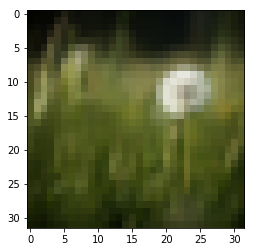

In [47]:
if __name__ == "__main__":
    main()